In [5]:
import pandas as pd
import numpy as np

In [6]:
exact_column = "exact_data_based"
eps = 0.000001

import utils
input = utils.load_data([
    "../results/synthetic/1000/set4_aggregated/"
], "_x80_*")


get exact values using pgm method on the data

In [7]:
# get exact rows
exact_data = input[input.method == "exact_data_based"].copy()
exact_data["identifiable"] = (exact_data.pns_u - exact_data.pns_l).abs() < eps

Merge stuff

In [22]:
data = input[(input.method=="EMCC") ].merge(exact_data[["file", "identifiable", "pns_l", "pns_u"]], on="file")
data_ps1_0 = data[data['index'] == 2] 
data_ps1_1 = data[data['index'] == 1]
data = data[(data['index'] > 2) & (~data.identifiable)]
data['ps1_disc'] = pd.cut(data.ps1, bins=5)

In [23]:
data['error_diff'] = np.sqrt(((data.pns_l_x - data.pns_l_y) ** 2 + (data.pns_u_x - data.pns_u_y) ** 2) / 2) / (data.pns_u_x - data.pns_l_x)

<AxesSubplot:title={'center':'error_diff'}, xlabel='ps1_disc'>

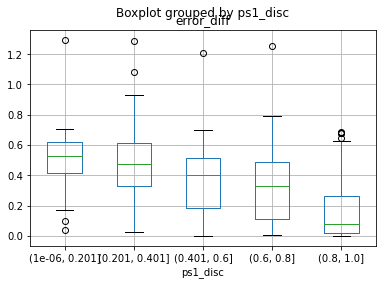

In [24]:
data.boxplot("error_diff", by='ps1_disc')

In [80]:
samples = beta.rvs(1,1,size=300, loc=0.5, scale=0.3)

In [81]:
beta.fit(samples, method="mle", floc=0.5, fscale=0.3)


(1.0110493116405375, 0.9770198275994865, 0.5, 0.3)